In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [5]:
from sklearn.cluster import KMeans

In [6]:
df=pd.read_csv("customer1.csv")

In [7]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Education,Income,MaritalStatus,MonthlyPremiumAuto,ClaimAmount
0,0,BU79786,Washington,2763.519279,Bachelor,56274,Married,69,384.811147
1,1,QZ44356,Arizona,6979.535903,Bachelor,0,Single,94,1131.464935
2,2,AI49188,Nevada,12887.431650,Bachelor,48767,Married,108,566.472247
3,3,WW63253,California,7645.861827,Bachelor,0,Married,106,529.881344
4,4,HB64268,Washington,2813.692575,Bachelor,43836,Single,73,138.130879
...,...,...,...,...,...,...,...,...,...
494,494,CK19789,California,5887.182043,Master,62773,Married,73,80.669257
495,495,UV12583,California,4700.583771,College,76694,Married,117,561.600000
496,496,JC11405,Oregon,10963.957230,High School or Below,55687,Divorced,276,1324.800000
497,497,KA89683,Arizona,2523.171245,High School or Below,0,Single,70,504.000000


In [8]:
df.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Education,Income,MaritalStatus,MonthlyPremiumAuto,ClaimAmount
0,0,BU79786,Washington,2763.519279,Bachelor,56274,Married,69,384.811147
1,1,QZ44356,Arizona,6979.535903,Bachelor,0,Single,94,1131.464935
2,2,AI49188,Nevada,12887.431650,Bachelor,48767,Married,108,566.472247
3,3,WW63253,California,7645.861827,Bachelor,0,Married,106,529.881344
4,4,HB64268,Washington,2813.692575,Bachelor,43836,Single,73,138.130879


In [9]:
df.isnull().sum()

Unnamed: 0               0
Customer                 0
State                    0
CustomerLifetimeValue    0
Education                0
Income                   0
MaritalStatus            0
MonthlyPremiumAuto       0
ClaimAmount              0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'CustomerLifetimeValue', 'Education',
       'Income', 'MaritalStatus', 'MonthlyPremiumAuto', 'ClaimAmount'],
      dtype='object')

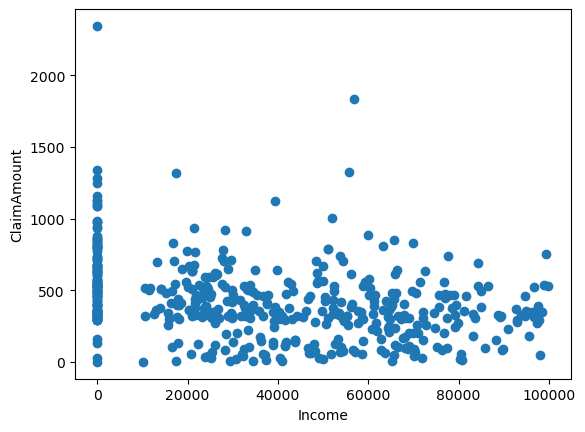

In [11]:
plt.scatter(df['Income'],df['ClaimAmount'])
plt.xlabel("Income")
plt.ylabel("ClaimAmount")
plt.show()

Text(0, 0.5, 'MonthlyPremiumAuto')

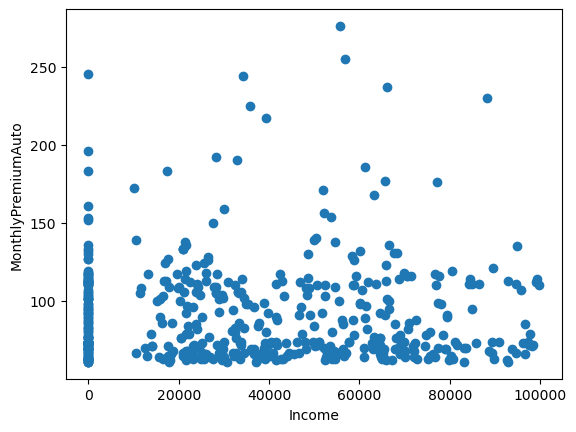

In [12]:
plt.scatter(df["Income"],df["MonthlyPremiumAuto"])
plt.xlabel("Income")
plt.ylabel("MonthlyPremiumAuto")

Text(0, 0.5, 'Income')

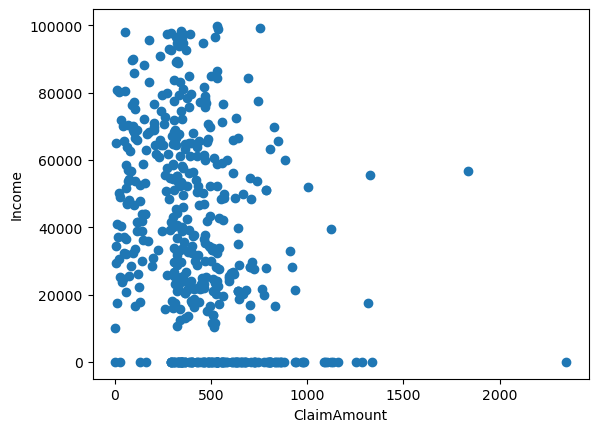

In [13]:
plt.scatter(df["ClaimAmount"], df["Income"])
plt.xlabel("ClaimAmount")
plt.ylabel("Income")

In [14]:
relevant_cols = ["Income", "MonthlyPremiumAuto", 
                 "ClaimAmount"]

customer_df = df[relevant_cols]

In [15]:
customer_df

,Income,MonthlyPremiumAuto,ClaimAmount
0,56274,69,384.811147
1,0,94,1131.464935
2,48767,108,566.472247
3,0,106,529.881344
4,43836,73,138.130879
...,...,...,...
494,62773,73,80.669257
495,76694,117,561.600000
496,55687,276,1324.800000
497,0,70,504.000000


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(customer_df)

StandardScaler()

In [19]:
scaled_data = scaler.transform(customer_df)

In [20]:
scaled_data

array([[ 0.69412228, -0.69906084, -0.17372421],
       [-1.22155017,  0.0696288 ,  2.60139397],
       [ 0.43856993,  0.500095  ,  0.50146291],
       ...,
       [ 0.6741397 ,  5.6656894 ,  3.31997018],
       [-1.22155017, -0.66831326,  0.2692698 ],
       [ 0.02550582,  0.13112397,  0.10870662]])

In [21]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values


In [22]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [23]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

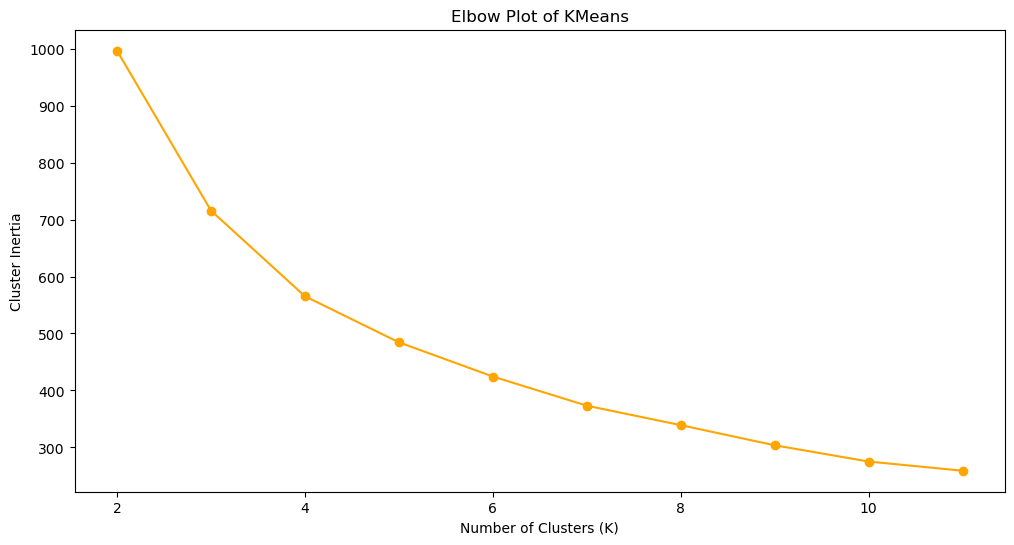

In [24]:
generate_elbow_plot(clusters_centers, k_values)

In [25]:
kmeans_model = KMeans(n_clusters = 5)

In [26]:
kmeans_model.fit(scaled_data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [27]:
df["clusters"] = kmeans_model.labels_

In [28]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Education,Income,MaritalStatus,MonthlyPremiumAuto,ClaimAmount,clusters
0,0,BU79786,Washington,2763.519279,Bachelor,56274,Married,69,384.811147,4
1,1,QZ44356,Arizona,6979.535903,Bachelor,0,Single,94,1131.464935,2
2,2,AI49188,Nevada,12887.431650,Bachelor,48767,Married,108,566.472247,1
3,3,WW63253,California,7645.861827,Bachelor,0,Married,106,529.881344,2
4,4,HB64268,Washington,2813.692575,Bachelor,43836,Single,73,138.130879,4
...,...,...,...,...,...,...,...,...,...,...
494,494,CK19789,California,5887.182043,Master,62773,Married,73,80.669257,4
495,495,UV12583,California,4700.583771,College,76694,Married,117,561.600000,1
496,496,JC11405,Oregon,10963.957230,High School or Below,55687,Divorced,276,1324.800000,3
497,497,KA89683,Arizona,2523.171245,High School or Below,0,Single,70,504.000000,0


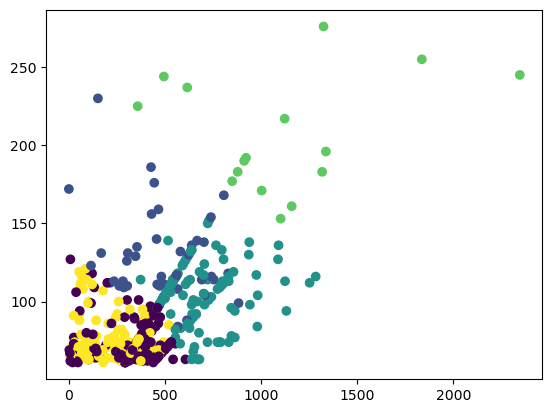

In [29]:
plt.scatter(df["ClaimAmount"], 
            df["MonthlyPremiumAuto"], 
            c = df["clusters"]
            )